**Bank Customer Churn Analysis & Prediction**

Dalam analisis ini, saya akan menggunakan dataset yang terdiri dari data nasabah bank. Tujuan saya adalah melakukan analisis eksplorasi untuk mendapatkan wawasan tentang faktor utama yang memengaruhi churn pelanggan.

Selain itu, saya akan mengembangkan machine learning model untuk memprediksi churn pelanggan secara akurat.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
data = pd.read_csv("Customer-Churn-Records.csv")

In [6]:
%matplotlib inline

In [7]:
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [8]:
data.shape

(10000, 18)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [10]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [11]:
data.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

No null Values

In [12]:
data.Surname.nunique()

2932

In [13]:
data['Surname'].describe()

count     10000
unique     2932
top       Smith
freq         32
Name: Surname, dtype: object

Text(0.5, 1.0, 'Top 10 Surname (Exited)')

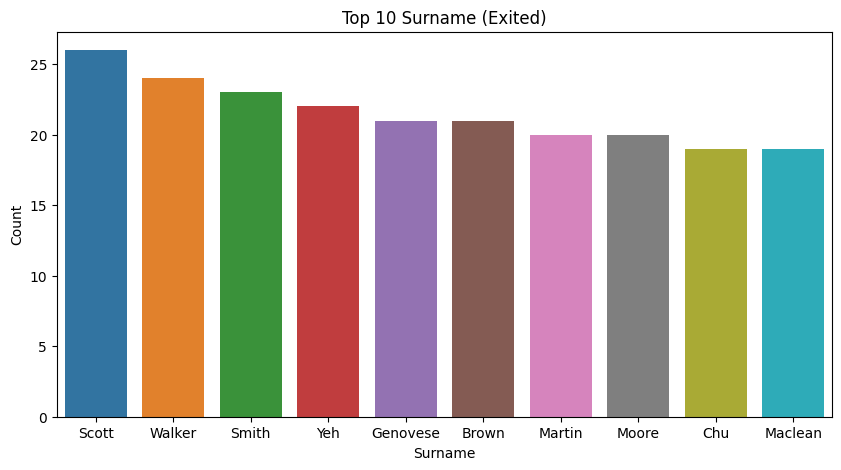

In [14]:
plt.figure(figsize = (10,5))
sur_exit = data.groupby(['Surname', 'Exited']).size().reset_index(name='Count')

sur_exit = sur_exit.sort_values(by='Count', ascending=False)
sur_exit = sur_exit.head(10)
sns.barplot(data=sur_exit, x='Surname', y='Count')
plt.title('Top 10 Surname (Exited)')

In [15]:
df = data.drop(columns={'RowNumber', 'CustomerId', 'Surname'}, axis=1)

In [16]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [17]:
df.duplicated().sum()

0

In [18]:
print('Minimun Age:',df['Age'].min())
print('Maximum Age:',df['Age'].max())
print('Median Age:',df['Age'].median())

Minimun Age: 18
Maximum Age: 92
Median Age: 37.0


In [19]:
#Number of customers by Geography and Age Group:

# Create age groups (e.g., 20-30, 31-40, etc.)
age_bins = [0, 20, 30, 40, 50, 60, 70]
age_labels = ['0-20', '20-30', '31-40', '41-50', '51-60', '61+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Aggregate number of customers by geography and age group
No_of_customers_geo_age = df.groupby(['Geography', 'Age Group']).size().reset_index(name='Number of Customers')

# Sort the aggregated data by the number of customers in ascending order
No_of_customers_geo_age_sorted = No_of_customers_geo_age.sort_values(by='Number of Customers', ascending=False)

# Display the sorted aggregated data
#print(No_of_customers_geo_age_sorted)

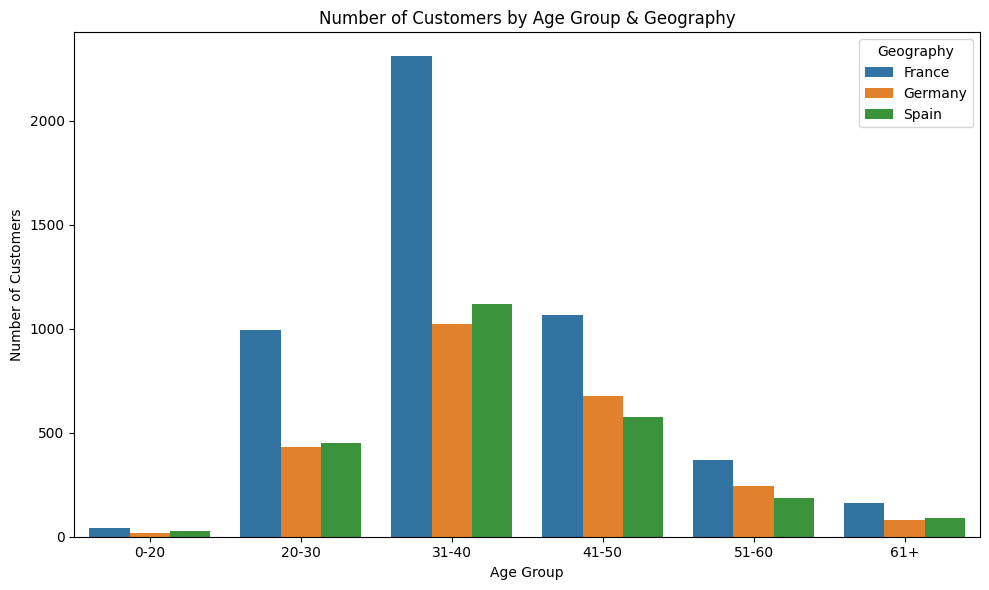

In [20]:
# Create the grouped bar chart
plt.figure(figsize=(10,6))
sns.barplot(data=No_of_customers_geo_age,x='Age Group', y='Number of Customers', hue='Geography',)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Age Group & Geography')

plt.tight_layout()
plt.show()

In [21]:
print('Minimum Salary:', df.EstimatedSalary.min())
print('Maximum Salary:', df.EstimatedSalary.max())
print('Median Salary:', df.EstimatedSalary.median())

Minimum Salary: 11.58
Maximum Salary: 199992.48
Median Salary: 100193.915


Setengah dari pelanggan memiliki gaji lebih dari $100193.915.

Penyebab: Hal ini menunjukkan bahwa bank memiliki porsi nasabah berpendapatan tinggi yang signifikan, hal ini dapat disebabkan oleh strategi pemasaran yang ditargetkan bank di pasar.

**Number of customers by Salary Group and Exit Status:**

In [22]:
salary_bins = [0,1000,10000,25000,50000,75000,100000,200000]

sal_labels = ['0-1K','1K-10K','10K-25K','25K-50K','50K-75K','75K-100K','100K+']
df['Salary Group'] = pd.cut(df['EstimatedSalary'], bins=salary_bins, labels=sal_labels)

# Aggregate number of customers by Salary Group and Exit Status
No_of_customers_Sal_Exited = df.groupby(['Salary Group', 'Exited']).size().reset_index(name='Number of Customers')

# Sort the aggregated data by the number of customers in ascending order
No_of_customers_Sal_Exited_sorted = No_of_customers_Sal_Exited.sort_values(by='Number of Customers', ascending=False)

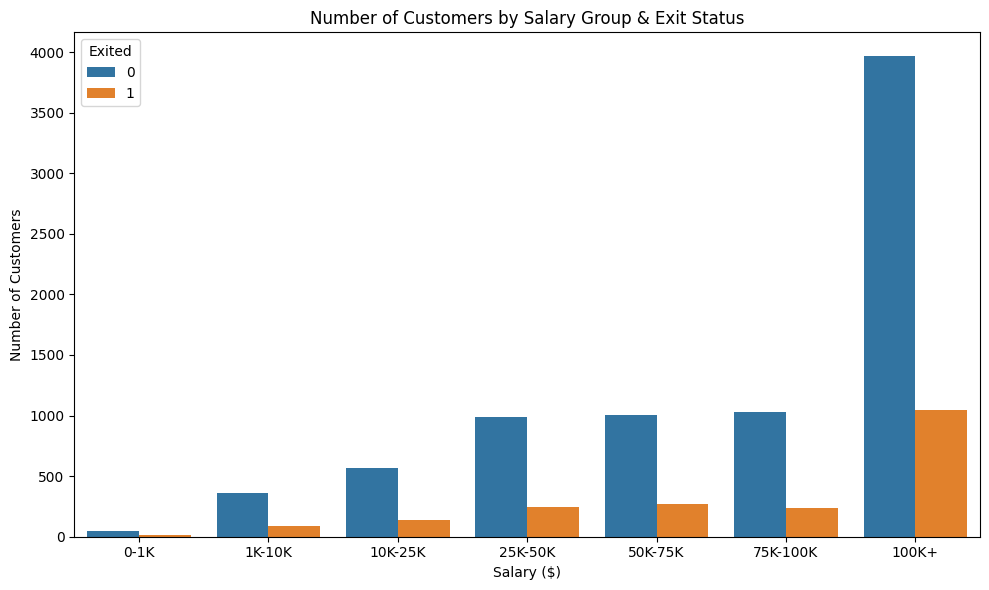

In [23]:
# Create the grouped bar chart
plt.figure(figsize=(10,6))
sns.barplot(data=No_of_customers_Sal_Exited_sorted ,x='Salary Group', y='Number of Customers', hue='Exited',)
plt.xlabel('Salary ($)')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Salary Group & Exit Status')

plt.tight_layout()
plt.show()

# 0 = didn't exit
# 1 = exited

Chart menunjukkan bahwa nasabah dengan gaji yang lebih tinggi memiliki kecenderungan yang lebih rendah untuk berhenti atau meninggalkan bank.

Menyebabkan:
Penawaran dan Penawaran yang Lebih Baik: Bank memberikan penawaran menarik kepada nasabah dengan pendapatan lebih tinggi, sehingga mengurangi kemungkinan mereka untuk beralih ke bank lain.

Stabilitas Keuangan: Nasabah dengan gaji yang lebih tinggi sering kali memiliki stabilitas keuangan dan daya beli yang lebih kuat, sehingga meningkatkan tingkat keterlibatan mereka dengan bank.

Relationship Management: Bank sering menugaskan relationship manager yang berdedikasi untuk klien berpenghasilan tinggi, memberikan bantuan yang dipersonalisasi dan membangun koneksi yang kuat yang meningkatkan kepercayaan dan kepuasan.

[]

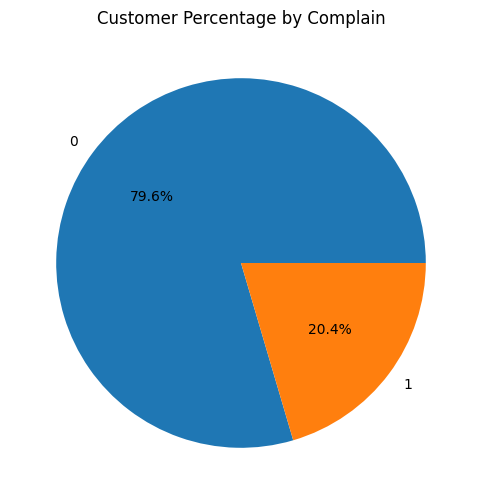

In [24]:
#Customer Percentage by Complain:

cmplt_cust = df.groupby(['Complain']).size()
plt.figure(figsize= (8,6))
plt.pie(cmplt_cust, labels = cmplt_cust.index,autopct='%1.1f%%')
plt.title('Customer Percentage by Complain')
plt.plot()

20,4% nasabah merupakan nasabah yang aktif menyampaikan keluhan atau ketidakpuasan terhadap pelayanan bank.

In [25]:
#Customer Count by Card Type and IsActiveMember:

# Aggregate customer count by card type and active membership
customer_count_card_member = df.groupby(['Card Type', 'IsActiveMember']).size().reset_index(name='Number of Customers')

# Display the aggregated data
#print(customer_count_card_member)

<Axes: xlabel='Card Type', ylabel='Number of Customers'>

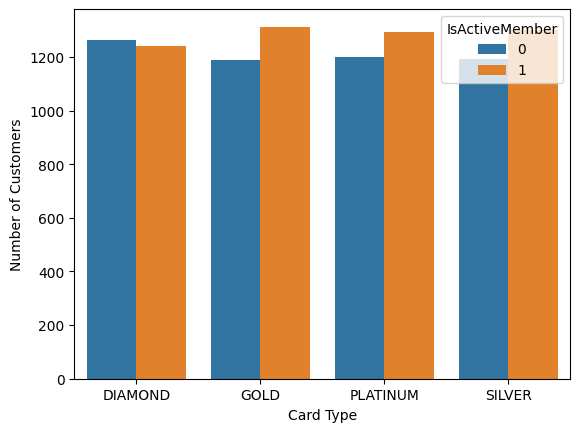

In [26]:
sns.barplot(data= customer_count_card_member, x= 'Card Type', y = 'Number of Customers', hue= 'IsActiveMember')

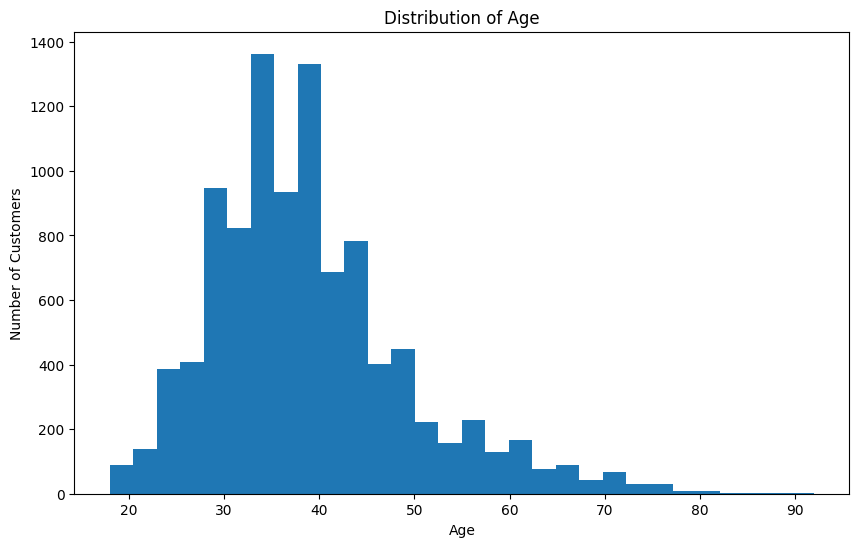

In [27]:
# Plot a histogram of the 'Age' feature

plt.figure(figsize =(10,6))
plt.hist(df['Age'], bins=30)
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Distribution of Age')
plt.show()

Pelanggan antara usia 26-45 adalah yang paling banyak

Penyebab: Kelompok usia ini mewakili populasi pekerja dan individu yang cenderung memiliki kebutuhan perbankan seperti pinjaman, hipotek, dan investasi.

**Distribution of Gender:**

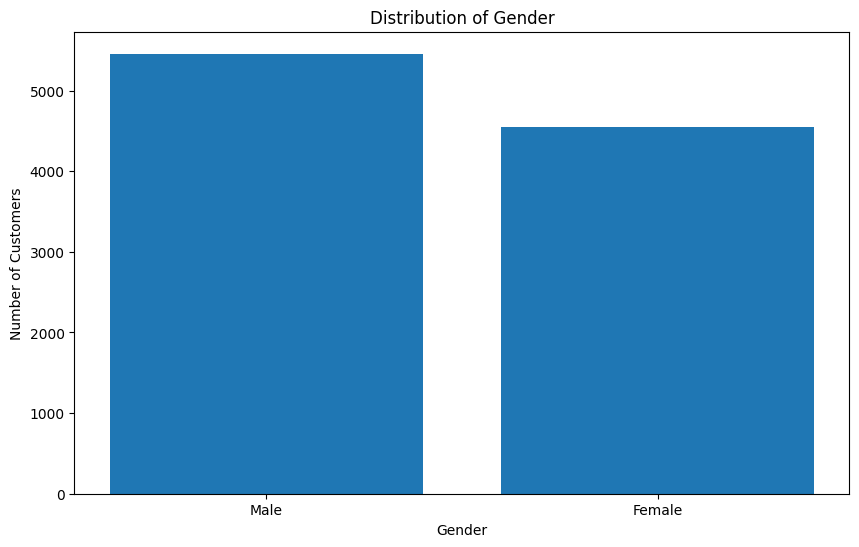

In [28]:
# Plot a bar chart of the 'Gender' feature
plt.figure(figsize =(10,6))
gender_counts = df['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Distribution of Gender')
plt.show()

Bukan perbedaan yang besar dalam distribusi gender pelanggan.

Penyebab: Hal ini menunjukkan bahwa bank menargetkan kedua jenis kelamin secara setara dalam pemasarannya.

**Distribution of Card Type:**

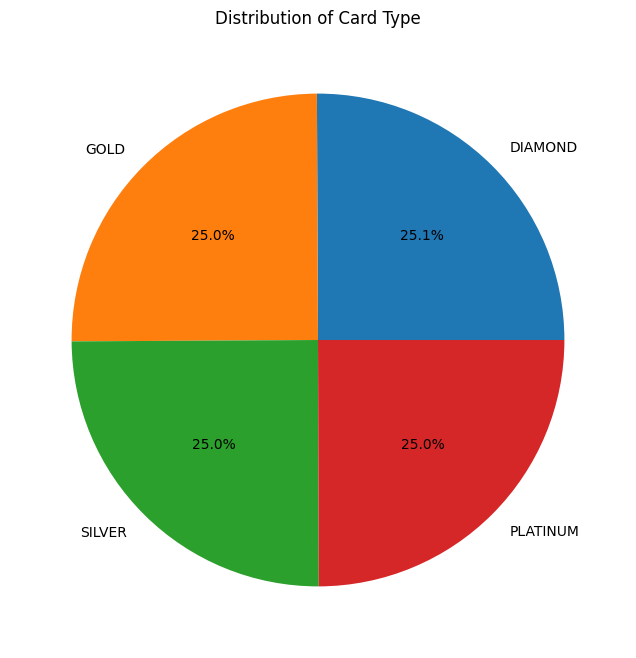

In [29]:
# Plot a pie chart of the 'Card Type' feature

plt.figure(figsize =(12,8))

card_type_counts = df['Card Type'].value_counts()
plt.pie(card_type_counts, labels=card_type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Card Type')
plt.show()

Hampir semua jenis kartu memiliki pangsa pelanggan yang sama.

Penyebab: Distribusi jenis kartu menunjukkan bahwa nasabah memiliki preferensi yang beragam, dan bank telah secara efektif memasarkan dan menyediakan pilihan untuk berbagai jenis kartu untuk memenuhi kebutuhan nasabah.

In [30]:
df[df['Gender']=='Female']['Age'].value_counts()

35    209
39    208
40    205
37    200
38    200
     ... 
81      2
82      1
80      1
85      1
84      1
Name: Age, Length: 67, dtype: int64

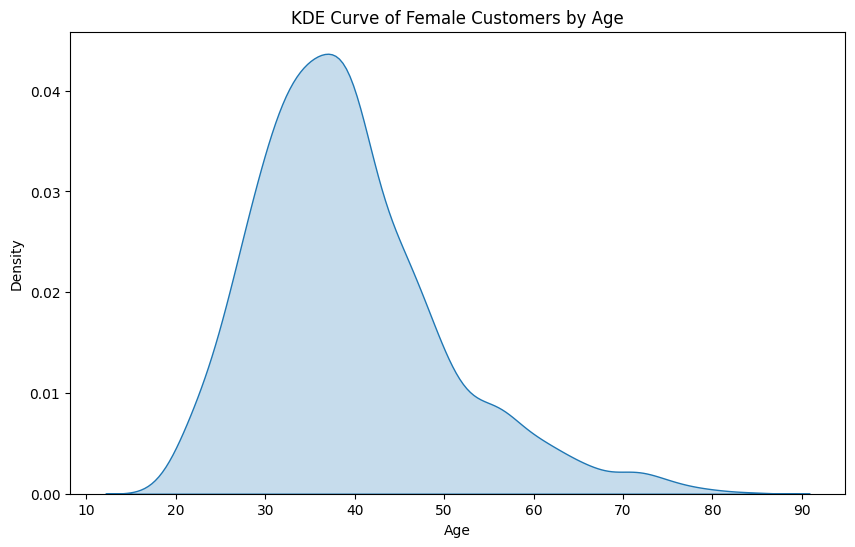

In [31]:
#To plot KDE Curve of Female Customers by Age

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Gender'] == 'Female'], x='Age', fill=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Curve of Female Customers by Age')
plt.show()

Di antara pelanggan wanita, terdapat kepadatan lebih tinggi pada usia antara 25-45 tahun.

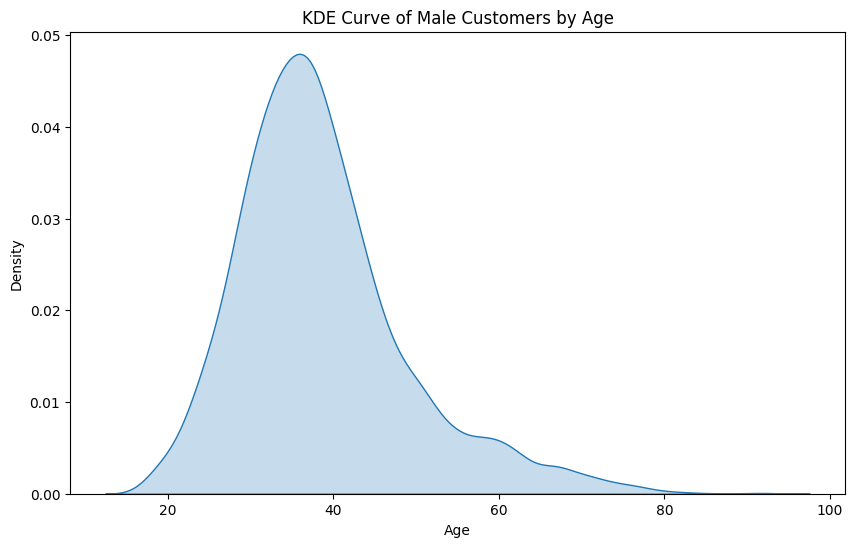

In [32]:
#To plot KDE Curve of Male Customers by Age

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Gender'] == 'Male'], x='Age', fill=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Curve of Male Customers by Age')
plt.show()

Di antara pelanggan laki-laki juga, terdapat kepadatan yang lebih tinggi pada usia antara 25-45 tahun.

Saran bagi pihak bank: Dengan mengetahui kepadatan nasabah berdasarkan jenis kelamin dan usia, maka bank dapat secara efektif membidik nasabah sesuai dengan usia dan jenis kelamin.

**Correlation Matrix:**

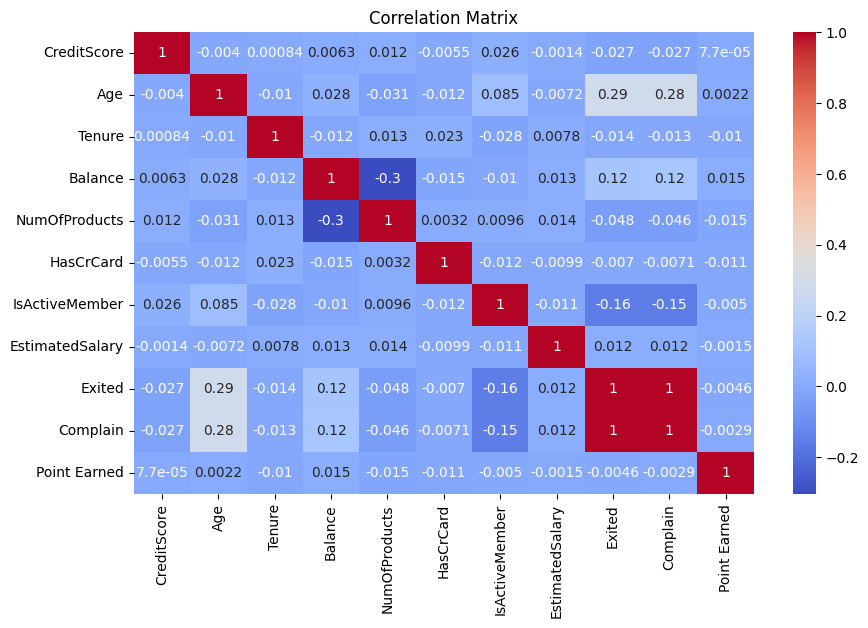

In [33]:
# Select only the numerical features for correlation matrix
numerical_features = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','HasCrCard','IsActiveMember', 'EstimatedSalary', 'Exited','Complain','Point Earned']]

# Compute the correlation matrix
corr_matrix = numerical_features.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize =(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Bukan korelasi yang sangat baik antara fitur

Temuan: Analisis korelasi menunjukkan bahwa tidak ada hubungan linier yang kuat antara fitur-fitur yang diperiksa.

Penyebab: Tidak adanya korelasi yang kuat menunjukkan bahwa churn pelanggan dapat dipengaruhi oleh kombinasi beberapa faktor daripada faktor dominan tunggal.

**Churn Rate by Geography:**

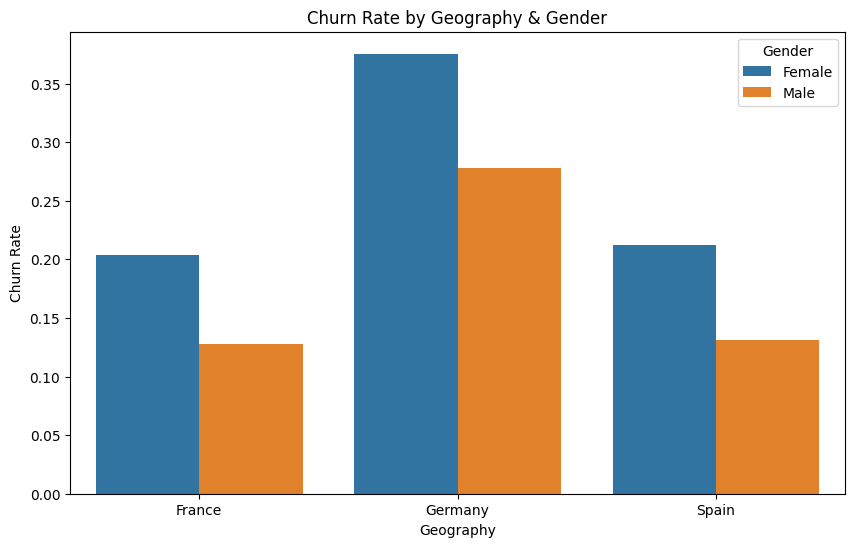

In [34]:
# Plot the churn rate by 'Geography' and 'Gender'
plt.figure(figsize =(10,6))

churn_rate_geo_gender = df.groupby(['Geography','Gender'])['Exited'].mean().reset_index(name="Churn Rate")
sns.barplot(data=churn_rate_geo_gender, x= 'Geography', y= 'Churn Rate', hue='Gender')
plt.xlabel('Geography')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Geography & Gender')
plt.show()

Jerman memiliki pelanggan dengan jumlah tertinggi. Dan di antara jenis kelamin, perempuan lebih banyak churn.

Penyebab: Bisa jadi karena berbagai alasan seperti ketidakpuasan nasabah, penawaran kompetitif dari bank lain, atau kondisi pasar tertentu di Jerman.

In [35]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Age Group,Salary Group
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,41-50,100K+
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,41-50,100K+


**Churn Rate berdasarkan Status Keluhan dan Anggota Aktif atau Tidak:**

Text(0.5, 1.0, 'Churn Rate by Complain & IsActiveMember')

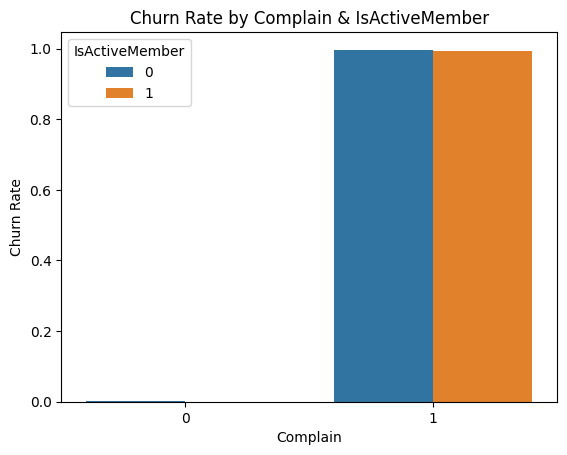

In [36]:
churn_rate_complain = df.groupby(['Complain','IsActiveMember'])['Exited'].mean().reset_index()
sns.barplot(x='Complain', y='Exited', data=churn_rate_complain,hue='IsActiveMember')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Complain & IsActiveMember')

A. Pelanggan dengan keluhan aktif memiliki tingkat churn yang lebih tinggi. Pelanggan tanpa keluhan apa pun memiliki tingkat churn yang hampir dapat diabaikan.

Penyebab: Pengaduan yang aktif dapat mengindikasikan ketidakpuasan terhadap layanan bank, masalah yang belum terselesaikan, atau pengalaman nasabah yang negatif. Nasabah yang mempunyai keluhan dan merasa tidak didengar atau tidak puas dengan tanggapan bank kemungkinan besar akan melakukan churn.

B. Churning pelanggan tidak dipengaruhi oleh apakah mereka adalah anggota aktif atau tidak.

Penyebab: Meskipun menjadi anggota aktif dapat memberikan manfaat dan peluang keterlibatan, hal ini mungkin bukan satu-satunya faktor yang memengaruhi churn pelanggan. Aspek lain seperti kualitas layanan, kepuasan, dan penawaran yang dipersonalisasi mungkin memainkan peran yang lebih signifikan.

**Churn Rate by Age and Gender:**

In [37]:
import plotly.express as px

# Calculate churn rate by age and gender
churn_rate_age_gender = df.groupby(['Age', 'Gender'])['Exited'].mean().reset_index()

# Create an interactive scatter plot
fig = px.scatter(data_frame=churn_rate_age_gender, x='Age', y='Exited', color='Gender',
                 title='Churn Rate by Age & Gender')
fig.update_layout(xaxis_title='Age', yaxis_title='Churn Rate')
fig.show()

Dari scatter plot terlihat hal tersebut

Nasabah berusia antara 45 - 70 tahun memiliki kecenderungan lebih tinggi untuk meninggalkan bank.
Perempuan memiliki tingkat churn yang lebih tinggi dibandingkan laki-laki.

Menyebabkan:
A. Nasabah yang lebih tua mungkin lebih cenderung mempertimbangkan untuk berpindah bank karena perubahan hidup, pensiun, atau mencari produk dan layanan keuangan yang lebih baik.

B. Tingginya churn rate pada pelanggan wanita dapat dipengaruhi oleh berbagai faktor seperti kepuasan pelanggan, kualitas layanan, strategi pemasaran yang tepat sasaran, dan lain-lain.

**Churn Rate by Tenure & HasCrCard:**

In [38]:
# Aggregate churn rate by tenure and credit card status
churn_rate_tenure_card = data.groupby(['Tenure', 'HasCrCard'])['Exited'].mean().reset_index(name='Churn Rate')

# Display the aggregated data
#print(churn_rate_tenure_card)

In [39]:
# Create an interactive scatter plot
fig = px.scatter(churn_rate_tenure_card, x='Tenure', y='Churn Rate', color='HasCrCard',
                 title='Churn Rate by Tenure & Has CreduCard')
fig.update_layout(xaxis_title='Tenure', yaxis_title='Churn Rate')
fig.show()

Churn Rate by Geography and Tenure:

In [40]:
#Churn Rate by Tenure and HasCrCard:

# Aggregate churn rate by tenure and credit card status
churn_rate_tenure_card = data.groupby(['Tenure', 'HasCrCard'])['Exited'].mean().reset_index(name='Churn Rate')

# Display the aggregated data
#print(churn_rate_tenure_card)

In [41]:
# Calculate churn rate by geography and tenure
churn_rate_geo_tenure = df.groupby(['Geography', 'Tenure'])['Exited'].mean().reset_index()

# Create an interactive bar chart
fig = px.bar(churn_rate_geo_tenure, x='Geography', y='Exited', color='Tenure',
             title='Churn Rate by Geography & Tenure')
fig.update_layout(xaxis_title='Geography', yaxis_title='Churn Rate')
fig.show()

Seperti bisa di lihat, nasabah lama adalah orang yang paling banyak meninggalkan bank.

Penyebab: Nasabah yang lebih tua (Nasabah dengan masa kerja yang lama di bank) mungkin lebih sadar akan kebutuhan perbankan mereka dan memiliki ekspektasi yang lebih tinggi mengenai layanan pelanggan, nasihat keuangan, dan penawaran yang dipersonalisasi. Jika harapan ini tidak terpenuhi, mereka dapat memilih untuk berpindah bank.

**Churn Rate by Credit Score and Number Of Products:**

In [42]:
# Calculate churn rate by credit score and number of products
churn_rate_credit_products = df.groupby(['CreditScore', 'NumOfProducts'])['Exited'].mean().reset_index()

# Create an interactive heatmap
fig = px.density_heatmap(churn_rate_credit_products, x='CreditScore', y='NumOfProducts',
                         z='Exited', title='Churn Rate by Credit Score & No. Of Products')
fig.update_layout(xaxis_title='Credit Score', yaxis_title='Number Of Products')
fig.show()

Dari heatmap terlihat jelas bahwa pelanggan dengan 3 nomor Produk dan nilai kredit antara 550 - 700 adalah yang terbanyak di antara pelanggan yang churn.

Penyebab: Pelanggan dengan banyak produk dan skor kredit moderat mungkin lebih sensitif terhadap perubahan kualitas layanan, harga, atau faktor persaingan lainnya. Mereka juga mungkin menjadi sasaran pesaing yang menawarkan insentif menarik untuk berpindah bank.

**Building ML Predictive Model**

In [43]:
#Drop redundant columns
df  = df.drop(['Age Group','Salary Group'], axis =1)

In [44]:
# Step 1: Data Preprocessing

# Handle Missing Values if any
df.fillna(method='ffill', inplace=True)

# Convert Categorical Columns to 'category' data type
df['Geography'] = df['Geography'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Card Type'] = df['Card Type'].astype('category')

# Encode Categorical Variables
encoded_data = pd.get_dummies(df, columns=['Geography', 'Gender', 'Card Type'], drop_first=True)

In [45]:
# Scale Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_data)

# Step 2: Feature Engineering

# Feature Selection
selected_features = encoded_data.drop(['Exited'], axis=1)
target_variable = encoded_data['Exited']

In [46]:
# Step 3: Model Selection and Training

# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_features, target_variable, test_size=0.2, random_state=42)

# Train and Evaluate Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [49]:
# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
# Calculate Precision
precision = precision_score(y_test, rf_predictions)
# Calculate Recall
recall = recall_score(y_test, rf_predictions)
# Calculate F1-score
f1 = f1_score(y_test, rf_predictions)

# Print the results

print("Accuracy score:",rf_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy score: 0.999
Precision: 0.9974554707379135
Recall: 0.9974554707379135
F1-score: 0.9974554707379135


In [50]:
# Step 4: Hyperparameter Tuning

# Optimize Model Performance
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Random Forest Classifier
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}

# Grid Search Cross Validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_

# Step 5: Model Evaluation

# Compare Model Performance
grid_search_predictions = grid_search.predict(X_test)
grid_search_accuracy = accuracy_score(y_test, grid_search_predictions)
grid_search_F1_Score = f1_score(y_test, grid_search_predictions)

print("Grid Search Accuracy:",grid_search_accuracy)
print("Grid Search F1-Score",grid_search_F1_Score)

Grid Search Accuracy: 0.999
Grid Search F1-Score 0.9974554707379135


In [51]:
best_params

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

Meskipun mencoba Penyetelan Hyperparameter, tampaknya tidak dapat meningkatkan performa model.

Namun, perlu dicatat bahwa akurasi model sebesar 99,9% dan F1-Score sebesar 0,997 menunjukkan model yang sangat efisien.

In [52]:
# Step 6: Deployment

# Deploy the Final Model
final_model = grid_search.best_estimator_
final_model.fit(selected_features, target_variable)

RandomForestClassifier()